# ~ PoC AI Pool 2025 ~
- ## Day 2: Neural Networks from Scratch
    - ### Module 2: Logistic Regression
-----------

In [78]:
import random
import matplotlib.pyplot as plt

Now you just dove into linear regression; let's discover another banger — **logistic regression**! 

While linear regression outputs continuous values, logistic regression predicts probabilities, making it ideal for classification tasks.

The key difference lies in the **output function**:
- Linear regression: $$y = a * x + b$$
- Logistic regression: $$ y = sigmoid(a * x + b)$$

Moreover, you might wonder: is it possible to perform logistic regression with a polynomial function? The answer is **yes**! Logistic regression can work with polynomial transformations of the input, allowing the model to capture non-linear decision boundaries.

Let's dive into building logistic regression step by step, including polynomial transformations!

In [79]:
#Create the training set
train_set = [
    [1, 0],
    [2, 0],
    [3, 0],
    [4, 0],
    [5, 0],
    [6, 1],
    [7, 1],
    [8, 1],
    [9, 1],
    [10, 1]
]

print(train_set)

[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1]]


Why a dataset like this you will say ? Because logistic regression works well as find cluster of data and make a linear observation of it here's what you need to understand 

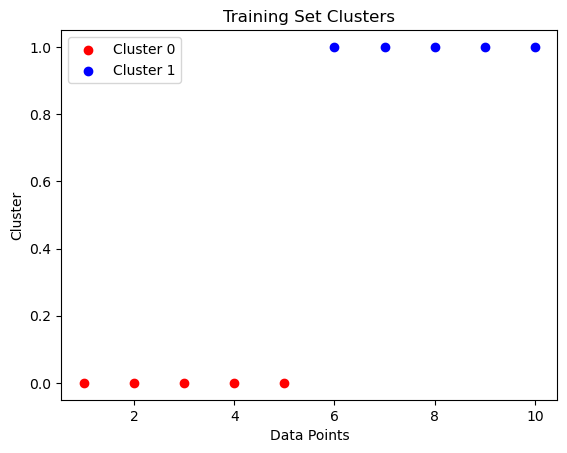

In [80]:
# Separate the training set into two clusters based on the label
cluster_0 = [point[0] for point in train_set if point[1] == 0]
cluster_1 = [point[0] for point in train_set if point[1] == 1]

# Plot the clusters
plt.scatter(cluster_0, [0] * len(cluster_0), color='red', label='Cluster 0')
plt.scatter(cluster_1, [1] * len(cluster_1), color='blue', label='Cluster 1')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.legend()
plt.title('Training Set Clusters')
plt.show()

### Step 2: Initialize the Weight and Bias

We need to initialize both `w` and `b` with random values beetwen 0 and 10 at the start :  

In [81]:
random.seed(0)
#TODO: randomise the weight and bias beetwen 0 and 10

mini = 0
maxi = 10

w = random.uniform(mini, maxi)
b = random.uniform(mini, maxi)

print("Initial Weight:", w)
print("Initial Bias:", b)

assert w > 8.44 and w < 8.45, "Weight is not correct"
assert b > 7.57 and b < 7.58, "Bias is not correct"

Initial Weight: 8.444218515250482
Initial Bias: 7.579544029403024


### step 3 : Make prediction using the known formula (with sigmoid)

To make predictions, we’ll use the sigmoid function, a fundamental tool in machine learning. The sigmoid is often used to squash values into the range [0, 1], which makes it particularly useful for binary classification tasks. It’s defined as:

$$
\sigma(y) = \frac{1}{1 + e^{-y}}
$$

Where:
•	 $ y = w \cdot x + b $  (the neuron formula if you had forgotten)

•	 $ e $ is the base of the natural logarithm.

The sigmoid function ensures that large positive values of  z  approach 1, and large negative values approach 0, with a smooth curve in between.


With the formula of above, calculate the `y_pred` of each input `x` in the train_set in a function call **forward** and it will use your **sigmoid** function 


In [82]:
import math

e = math.e

#TODO: Define the sigmoid function (use pow)
def sigmoid(x):
    return 1 / (1 + pow(e, -x))

assert sigmoid(1) > 0.73 and sigmoid(1) < 0.74, "Sigmoid is not correct"

In [83]:
#TODO : Define the forward function -> neuron function
def forward(x):
    return w * x + b

#TODO: Test the forward function
for x, y in train_set:
    y_pred = forward(x)
    print("Prediction:", y_pred, "Actual:", y)


Prediction: 16.023762544653508 Actual: 0
Prediction: 24.467981059903988 Actual: 0
Prediction: 32.91219957515447 Actual: 0
Prediction: 41.35641809040495 Actual: 0
Prediction: 49.800636605655434 Actual: 0
Prediction: 58.24485512090591 Actual: 1
Prediction: 66.6890736361564 Actual: 1
Prediction: 75.13329215140688 Actual: 1
Prediction: 83.57751066665736 Actual: 1
Prediction: 92.02172918190784 Actual: 1


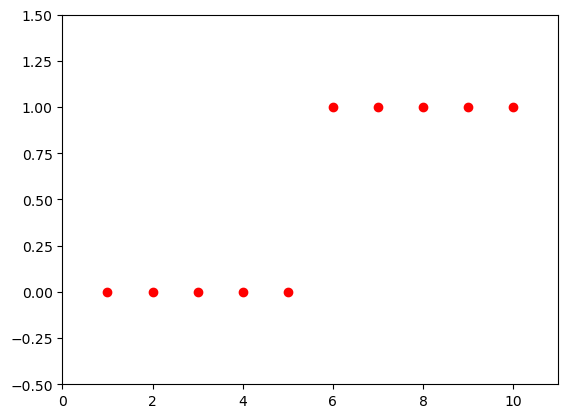

In [84]:
# graph of the prediction and the actual data
x = [i[0] for i in train_set]
y = [i[1] for i in train_set]
y_pred = [forward(i) for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, y_pred, 'bo')
plt.axis([0, 11, -0.5, 1.5])
plt.show()

Pretty close to having everything correct on the first try! As you can see, the separation between the two groups isn’t very clear yet. This is where the loss like before comes in to help us improve.

For this case, we’re going to use a different loss function: **Binary Cross-Entropy Loss**. This loss function is specifically designed for binary classification tasks *(predicting values between 0 and 1)*, which aligns perfectly with the output of our sigmoid function. Pretty neat, right?

Here’s a breakdown of how it works:

---

#### *Binary Cross-Entropy Loss Formula*

The Binary Cross-Entropy Loss (Single prediction) is defined as:

$$
\text{Loss} = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$


Where:
•	￼ $ y $ is the true label (0 or 1) for sample ￼.

•	￼ $ \hat{y} $ is the predicted probability for sample ￼ (the output of the function).

•	￼$\log$ is the natural logarithm.


The overall goal of this loss function is to minimize the difference between the true labels ￼ and the predicted probabilities ￼, guiding the model to make better predictions.

Next, implement this formula in your code to calculate the loss for your predictions.

In [85]:
from math import log

eps = 1e-15

def binary_cross_entropy_loss(y, y_pred):
    # We clamp the prediction value to avoid log(0)
    y_pred_clamped = max(min(y_pred, 1 - eps), eps)
    return -(y * log(y_pred_clamped) + (1 - y) * log(1 - y_pred_clamped))

#TODO: Test the binary cross entropy loss function
for x, y in train_set:
    loss = binary_cross_entropy_loss(y, forward(x))
    error = pow(y - forward(x), 2)
    print("Error:", error)

Error: 256.76096608744064
Error: 598.6820971478203
Error: 1083.212880874798
Error: 1710.353317268374
Error: 2480.103406328548
Error: 3276.9734378135076
Error: 4315.054395176377
Error: 5495.745005205845
Error: 6819.04526790191
Error: 8284.955183264574


as you can see the error for the data that are one is so small, but the first one is the one we need to update, the derivative are more simple here !

The derivative for `w`
$$
\frac{\partial L}{\partial w} = (y_{\text{pred}} - y) \, x.

$$

The derivative for `b`
$$
\frac{\partial L}{\partial b} = (y_{\text{pred}} - y)

$$

*Bonus : To better understand and apply the derivative of the function BCE with the logistic regression, try calculating it manually and never forget the chain rule ! :)* 

In [86]:
#TODO setup the derivative of the loss function 
def derivative_w(x, y, y_pred):
    return (y_pred - y) * x

def derivative_b(y, y_pred):
    return y_pred - y

def derivative(x, y, y_pred):
    return (derivative_w(x, y, y_pred), derivative_b(y, y_pred))

for x, y in train_set:
    y_pred = forward(x)
    derivative_weight, derivative_bias = derivative(x, y, y_pred)

    print(f"x: {x}, y: {y}, y_pred: {y_pred:.3f}, Derivative Weight: {derivative_weight:.3f}, Derivative Bias: {derivative_bias:.3f}")
    # Plot the derivatives
    dw_values = [derivative_w(x, y, forward(x)) for x, y in train_set]
    db_values = [derivative_b(y, forward(x)) for x, y in train_set]

x: 1, y: 0, y_pred: 16.024, Derivative Weight: 16.024, Derivative Bias: 16.024
x: 2, y: 0, y_pred: 24.468, Derivative Weight: 48.936, Derivative Bias: 24.468
x: 3, y: 0, y_pred: 32.912, Derivative Weight: 98.737, Derivative Bias: 32.912
x: 4, y: 0, y_pred: 41.356, Derivative Weight: 165.426, Derivative Bias: 41.356
x: 5, y: 0, y_pred: 49.801, Derivative Weight: 249.003, Derivative Bias: 49.801
x: 6, y: 1, y_pred: 58.245, Derivative Weight: 343.469, Derivative Bias: 57.245
x: 7, y: 1, y_pred: 66.689, Derivative Weight: 459.824, Derivative Bias: 65.689
x: 8, y: 1, y_pred: 75.133, Derivative Weight: 593.066, Derivative Bias: 74.133
x: 9, y: 1, y_pred: 83.578, Derivative Weight: 743.198, Derivative Bias: 82.578
x: 10, y: 1, y_pred: 92.022, Derivative Weight: 910.217, Derivative Bias: 91.022


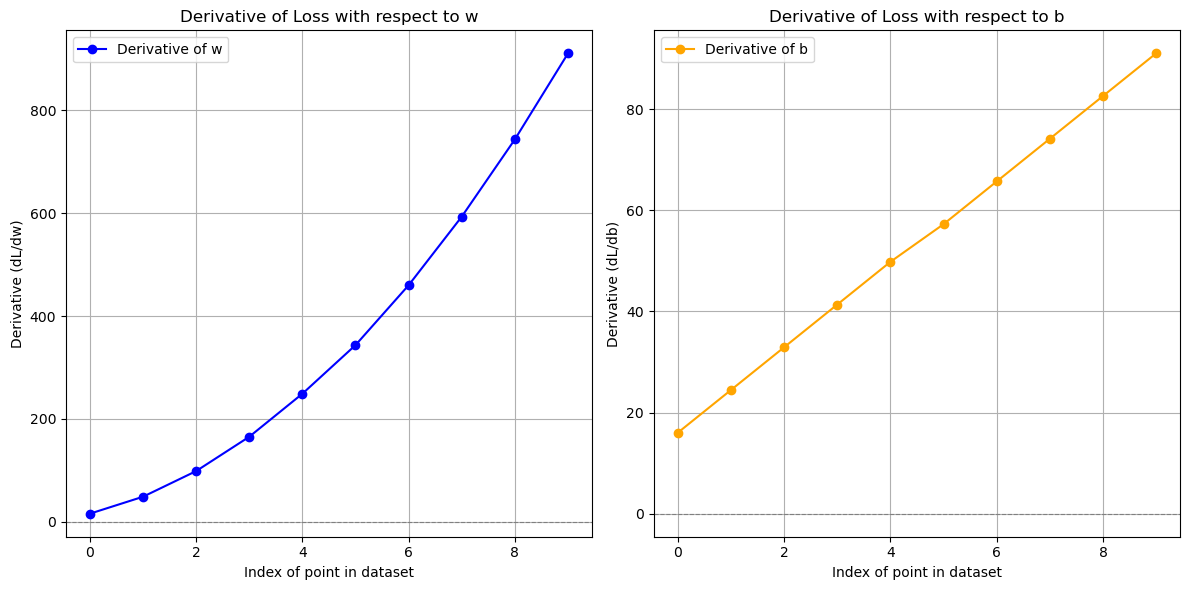

In [87]:
plt.figure(figsize=(12, 6))

# Plot derivative of w
plt.subplot(1, 2, 1)
plt.plot(range(len(dw_values)), dw_values, marker='o', color='blue', label="Derivative of w")
plt.title("Derivative of Loss with respect to w")
plt.xlabel("Index of point in dataset")
plt.ylabel("Derivative (dL/dw)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

# Plot derivative of b
plt.subplot(1, 2, 2)
plt.plot(range(len(db_values)), db_values, marker='o', color='orange', label="Derivative of b")
plt.title("Derivative of Loss with respect to b")
plt.xlabel("Index of point in dataset")
plt.ylabel("Derivative (dL/db)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [88]:
# OPTIONNAL BUT RECOMMENDED : if you want reload the weight randomly at the first value 

w = random.uniform(mini, maxi)
b = random.uniform(mini, maxi)

Now try your best to implement thetrain version ! *The same way you did for the linear regression remember it !*

In [89]:
#TODO: Train the model

epochs = 20
learning_rate = 0.01


for i in range (epochs) :
    for x, y in train_set :
        y_pred = forward(x)
        dw, db = derivative(x, y, y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
        loss = binary_cross_entropy_loss(y, y_pred)
        print(f"Epoch: {epochs}, Loss: {loss:.5f}")

print("Final Weight:", w)
print("Final Bias:", b)

Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 0.00000
Epoch: 20, Loss: 0.00000
Epoch: 20, Loss: 0.00000
Epoch: 20, Loss: 0.00000
Epoch: 20, Loss: 0.00000
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 1.04125
Epoch: 20, Loss: 1.35480
Epoch: 20, Loss: 1.03202
Epoch: 20, Loss: 0.60339
Epoch: 20, Loss: 0.29238
Epoch: 20, Loss: 0.12530
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 4.92485
Epoch: 20, Loss: 1.02686
Epoch: 20, Loss: 1.34404
Epoch: 20, Loss: 1.00935
Epoch: 20, Loss: 0.58541
Epoch: 20, Loss: 0.28103
Epoch: 20, Loss: 0.11873
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 34.53958
Epoch: 20, Loss: 3.80212
Epoch: 20, Loss: 1.00856
Epoch: 20, Loss: 1.33899
Epoch: 20, Loss: 0.99041
Epoch: 20, Loss: 0.56915
Epoch: 20, Loss: 0.27034
Epoch: 20,

In [90]:
x = 0
print ("Prediction ", forward(x))

Prediction  1.0415039287109316


In [91]:
for x, y in train_set:
    y_pred = forward(x)
    print (x, y_pred)

1 1.03738357919642
2 1.0332632296819089
3 1.0291428801673974
4 1.0250225306528862
5 1.0209021811383747
6 1.0167818316238633
7 1.012661482109352
8 1.0085411325948406
9 1.0044207830803291
10 1.0003004335658179


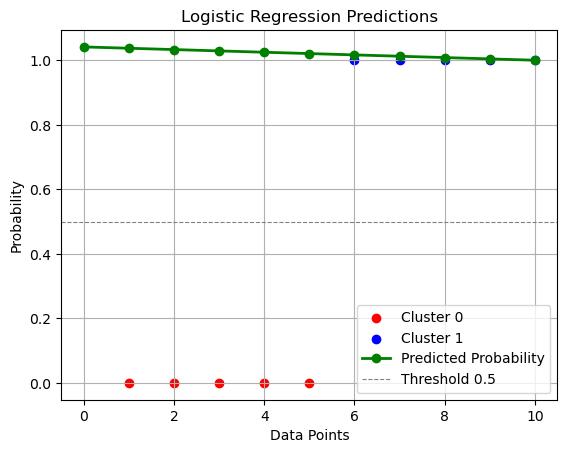

In [92]:

# Plot the actual data points
plt.scatter(cluster_0, [0] * len(cluster_0), color='red', label='Cluster 0')
plt.scatter(cluster_1, [1] * len(cluster_1), color='blue', label='Cluster 1')

# Plot the predicted probabilities
x_values = range(0, 11)
y_pred_values = [forward(x) for x in x_values]
plt.plot(x_values, y_pred_values, color='green', linestyle='-', linewidth=2, marker='o', label='Predicted Probability')

# Add a horizontal line at 0.5
plt.axhline(y=0.5, color='grey', linestyle='--', linewidth=0.8, label='Threshold 0.5')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Probability')
plt.title('Logistic Regression Predictions')
plt.legend()
plt.grid(True)
plt.show()

---
Congratulations on building your second machine learning algorithm !! now let's level up the difficulty and introduce you to the concept of neural network, good luck ! 